In [1]:
import unittest

In [2]:
instruction_list = list(map(int, open('input.txt').readlines()))

In [3]:
class VM(object):
    def __init__(self, instrl, debug=False, part=1):
        self.PC = 0
        self.steps = 0
        self.part = part
        self.instrl = instrl[:] # copy since we will re-use the input instruction for each part
        self.debug = debug
        self.max = len(instrl)
    
    def jmp(self):
        self.steps += 1
        offset = self.instrl[self.PC]
        if self.part == 1:
            self.instrl[self.PC] += 1
        else:
            if offset >= 3:
                self.instrl[self.PC] -= 1
            else:
                self.instrl[self.PC] += 1
        self.PC += offset
        if self.debug:
            print(self)
    
    def run(self):
        while self.oob() is None:
            self.jmp()
        return self.steps

    def oob(self):
        if self.PC >=0 and self.PC < self.max:
            return None
        else:
            return self.steps
        
    def __str__(self):
        outstr = ''
        for i, j in enumerate(self.instrl):
            if self.PC == i:
                outstr += f'({j}) '
            else:
                outstr += f' {j}  '
        return outstr


In [4]:
class TestIt(unittest.TestCase):
    def test_01(self):
        testVM = VM([0, 3,  0,  1,  -3], debug=True)
        print('Part 1')
        count = testVM.run()
        self.assertEqual(count, 5)
    def test_02(self):
        testVM = VM([0, 3,  0,  1,  -3], part=2, debug=True)
        print('Part 2')
        count = testVM.run()
        self.assertEqual(count, 10)

In [5]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestIt)
unittest.TextTestRunner(verbosity=2).run(suite)

test_01 (__main__.TestIt) ... ok
test_02 (__main__.TestIt) ... 

Part 1
(1)  3   0   1   -3  
 2  (3)  0   1   -3  
 2   4   0   1  (-3) 
 2  (4)  0   1   -2  
 2   5   0   1   -2  
Part 2
(1)  3   0   1   -3  
 2  (3)  0   1   -3  
 2   2   0   1  (-3) 
 2  (2)  0   1   -2  
 2   3   0  (1)  -2  
 2   3   0   2  (-2) 
 2   3  (0)  2   -1  
 2   3  (1)  2   -1  
 2   3   2  (2)  -1  
 2   3   2   3   -1  


ok

----------------------------------------------------------------------
Ran 2 tests in 0.011s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [6]:
part1VM = VM(instruction_list)

In [7]:
print(f'part1 answer: {part1VM.run()}')

part1 answer: 391540


In [8]:
part2VM = VM(instruction_list, part=2)

In [9]:
print(f'part2 answer: {part2VM.run()}')

part2 answer: 30513679


### Visualisations...

In [31]:
visualise_list = [0, 3,  0,  1,  -3]

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
g = nx.DiGraph()

In [34]:
g.add_node('Exit Low')
g.add_node('Exit High')
for i, o in enumerate(visualise_list):
    g.add_node(i)
for i, o in enumerate(visualise_list):
    if (i+o) < 0:
        g.add_edge(i, 'Exit Low')
    elif (i+o) > len(visualise_list):
        g.add_edge(i, 'Exit High')
    else:
        g.add_edge(i, i+o)


In [35]:
pos = nx.spring_layout(g)

C:\Users\oakden\Anaconda2\envs\dspython361\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\oakden\Anaconda2\envs\dspython361\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\oakden\Anaconda2\envs\dspython361\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\oakden\Anaconda2\envs\dspython361\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

AttributeError: module 'networkx' has no attribute 'draw_labels'

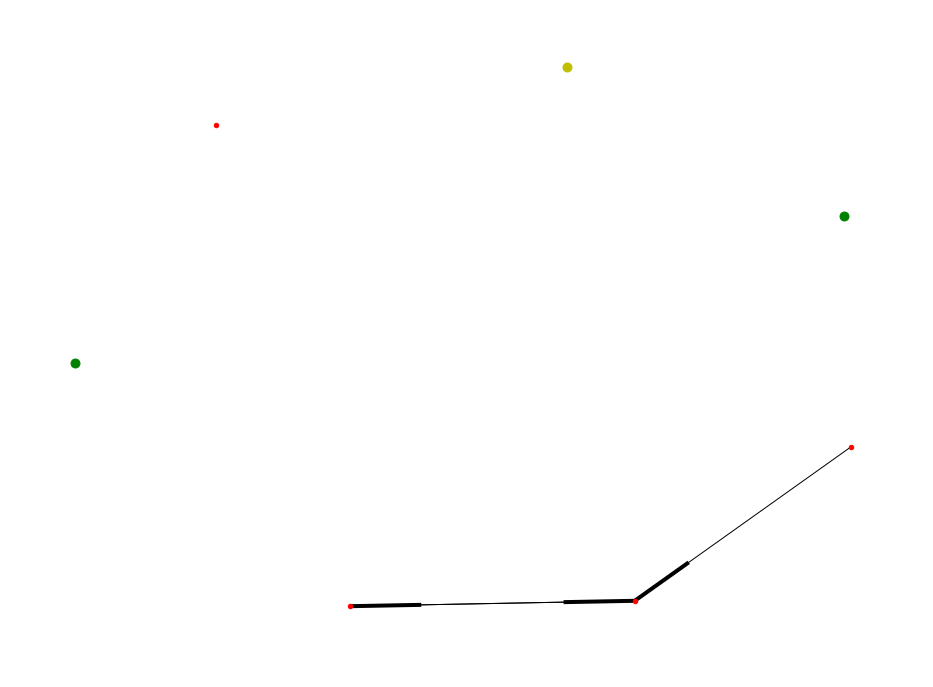

In [38]:
label_pos = {key: (pos[key][0], pos[key][1] + 0.03) for key in pos}
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw(g, pos=pos, node_size=20)
nx.draw_networkx_nodes(g, pos=pos, nodelist=['Exit Low', 'Exit High'], node_size=80, node_color='g')
nx.draw_networkx_nodes(g, pos=pos, nodelist=[0], node_size=80, node_color='y')
nx.draw_labels(g, pos=label_pos)

[(0, 0), (1, 1), (2, 2)]